In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
train = pd.read_csv('train.csv')

In [308]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [309]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [310]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [311]:
train.describe()['price_doc']

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

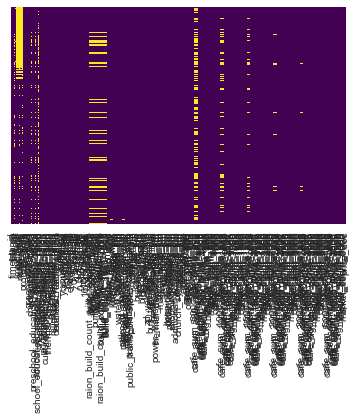

In [147]:
#Let's check the missing data in the training sample

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [289]:
#Let's construct a quick linear regression model based only on the training data (we dont consider macro.csv for now)
#We roughly clean the training data by supressing the columns with missing data and the columns with non-numerical data

In [312]:
#In a first time, let's drop the column where we have missing data

cleaned = train.dropna(axis=1)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 241 entries, id to price_doc
dtypes: float64(68), int64(157), object(16)
memory usage: 56.0+ MB


In [313]:
cleaned.head()

,id,timestamp,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,...,319,108,17,135,236,2,91,195,14,16331452


In [315]:
#Let's keep only numerical columns

cleaned = cleaned.ix[:,cleaned.applymap(np.isreal).all(axis=0)]

In [316]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 225 entries, id to price_doc
dtypes: float64(68), int64(157)
memory usage: 52.3 MB


In [301]:
#Let's do our linear regression

In [364]:
#Test train split

from sklearn.model_selection import train_test_split

In [365]:
X = cleaned.drop('price_doc',axis=1)
y = cleaned['price_doc']

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [485]:
#linear regression

from sklearn.linear_model import LinearRegression

In [486]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [487]:
predictions = lm.predict(X_test)

In [488]:
print(lm.intercept_)

10827630.4134


In [489]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
coeff_df

,Coeff
id,7.393015e+01
full_sq,3.025466e+04
area_m,1.282085e-02
raion_popul,-4.507577e+05
green_zone_part,-2.844630e+05
indust_part,-2.466060e+06
children_preschool,5.586229e+05
preschool_education_centers_raion,1.045586e+05
children_school,3.254974e+05
school_education_centers_raion,5.631103e+04


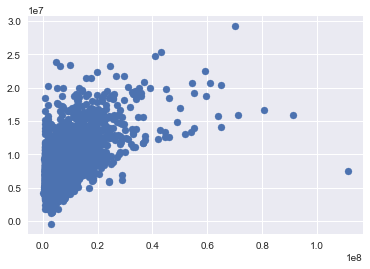

In [490]:
plt.scatter(y_test,predictions)

In [491]:
from sklearn import metrics

In [492]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 2175610.0377330794)
('MSE:', 16242858527025.256)
('RMSE:', 4030242.9861021102)


In [493]:
#RMLSE
epsilon = 0
n=len(y_test)
for i in range(0,n):
    epsilon += (np.log(predictions[i]+1)-np.log(y_test.iloc[i]+1))**2
epsilon = epsilon/n
epsilon = np.sqrt(epsilon)
print(epsilon)

nan


/Users/David/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


In [483]:
#Let's try udacity Boston house prices prediction !

In [494]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

In [495]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [496]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

In [ ]:
predictions_boston = reg.predict(X_test)

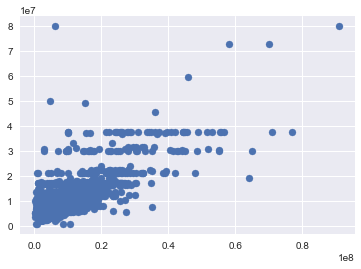

In [480]:
plt.scatter(y_test,predictions_boston)

In [482]:
#RMLSE
epsilon = 0
n=len(y_test)
for i in range(0,n):
    epsilon += (np.log(predictions_boston[i]+1)-np.log(y_test.iloc[i]+1))**2
epsilon = epsilon/n
epsilon = np.sqrt(epsilon)
print(epsilon)

0.491345397858
